In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = [os.path.join('data', item) for item in os.listdir(f'data')]
files

['data/.DS_Store', 'data/opendata.csv']

In [3]:
data = pd.read_csv(files[1], encoding='windows-1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [4]:
data.describe()

,value
count,7.484200e+04
mean,2.018732e+05
std,4.527957e+05
min,1.000000e+00
25%,1.412000e+03
50%,1.395050e+04
75%,1.992958e+05
max,6.631650e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74842 entries, 0 to 74841
Data columns (total 4 columns):
name      74842 non-null object
region    74842 non-null object
date      74842 non-null object
value     74842 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
data['name'].unique()

array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [7]:
# Определяем целевую переменную
target_value = 'Средняя зарплата'
target_df = data.loc[data['name'] == target_value]
target_df.head()

,name,region,date,value
34438,Средняя зарплата,Россия,2015-01-15,17638
34439,Средняя зарплата,Россия,2015-02-15,23301
34440,Средняя зарплата,Россия,2015-03-15,23823
34441,Средняя зарплата,Россия,2015-04-15,27088
34442,Средняя зарплата,Россия,2015-05-15,25175


In [8]:
data['region'].unique()

array(['Россия', 'Алтайский край', 'Амурская область',
       'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',

In [9]:
# Определяем целевой регион
region = 'Ленинградская область'
df = target_df.loc[target_df['region'] == region]
df.head()

,name,region,date,value
35712,Средняя зарплата,Ленинградская область,2015-01-15,14845
35713,Средняя зарплата,Ленинградская область,2015-02-15,17805
35714,Средняя зарплата,Ленинградская область,2015-03-15,20438
35715,Средняя зарплата,Ленинградская область,2015-04-15,21745
35716,Средняя зарплата,Ленинградская область,2015-05-15,24147


In [10]:
# Определяем временной интервал
start = '2016-06'
end = '2019'

salary = pd.Series(df['value'].tolist(), index=pd.to_datetime(df['date']), name='salary')[start:end]
salary.head()

date
2016-06-15    32419
2016-07-15    30232
2016-08-15    28477
2016-09-15    27446
2016-10-15    27609
Name: salary, dtype: int64

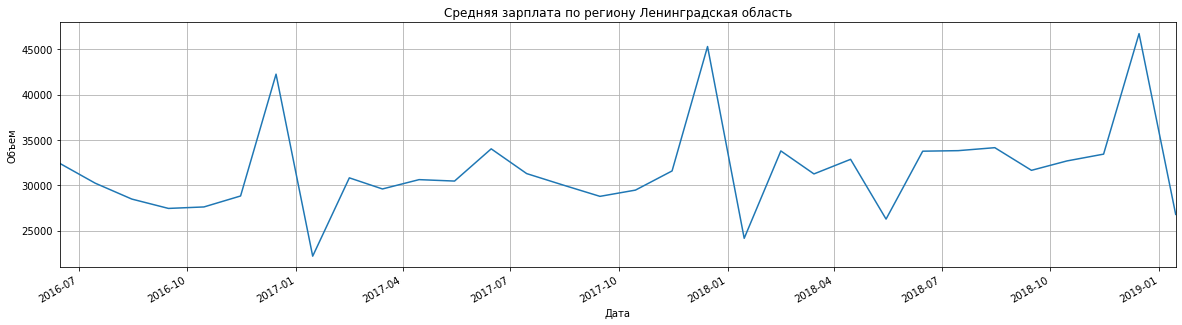

In [11]:
ax = salary.plot(label=salary.name, figsize=(20, 5))
ax.set_xlabel('Дата')
ax.set_ylabel('Объем')
plt.title(f'{target_value.capitalize()} по региону {region}')
plt.grid(True)
plt.show()